<a href="https://colab.research.google.com/github/Akua-Amoabea/Sentimental-Analysis-on-Movie-Review/blob/main/SENTIMENTAL_ANALYSIS_ON_IMDB_USING_DEEP_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import tensorflow as tf
import keras



from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IMDB Dataset.csv")

In [7]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [43]:
# positive -> 1
# negative -> 0
data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)

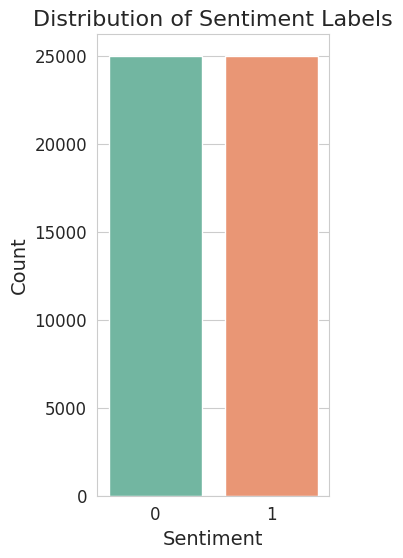

In [44]:
sns.set_style("whitegrid")

plt.figure(figsize=(3, 6))
sns.countplot(x='sentiment', data=data, palette='Set2')
plt.title('Distribution of Sentiment Labels', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [45]:
train_data, test_data = train_test_split(data, test_size = 0.2, random_state=42)

In [46]:
test_data.shape

(10000, 2)

In [47]:
train_data.shape

(40000, 2)

In [48]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [49]:
tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(train_data["review"])

In [50]:
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=200)

In [51]:
X_train

array([[1935,    1, 1200, ...,  205,  351, 3856],
       [   3, 1651,  595, ...,   89,  103,    9],
       [   0,    0,    0, ...,    2,  710,   62],
       ...,
       [   0,    0,    0, ..., 1641,    2,  603],
       [   0,    0,    0, ...,  245,  103,  125],
       [   0,    0,    0, ...,   70,   73, 2062]], dtype=int32)

In [52]:
X_test

array([[   0,    0,    0, ...,  995,  719,  155],
       [  12,  162,   59, ...,  380,    7,    7],
       [   0,    0,    0, ...,   50, 1088,   96],
       ...,
       [   0,    0,    0, ...,  125,  200, 3241],
       [   0,    0,    0, ..., 1066,    1, 2305],
       [   0,    0,    0, ...,    1,  332,   27]], dtype=int32)

In [53]:
Y_train = train_data["sentiment"]
Y_test = test_data["sentiment"]

In [54]:
Y_train

39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 40000, dtype: int64

In [55]:
model = Sequential()
model.add(Embedding(input_dim =5000, output_dim = 128, input_length = 200))
model.add(LSTM(128, dropout=0.2, recurrent_dropout = 0.2))
model.add(Dense(1, activation = "sigmoid"))

In [56]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 128)          640000    
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 771713 (2.94 MB)
Trainable params: 771713 (2.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
model.compile(optimizer = "adam", loss="binary_crossentropy", metrics=["accuracy"])

In [58]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64, validation_split = 0.2)

Epoch 1/5
500/500 [==============================] - 391s 778ms/step - loss: 0.4171 - accuracy: 0.8046 - val_loss: 0.3357 - val_accuracy: 0.8561
Epoch 2/5
500/500 [==============================] - 385s 771ms/step - loss: 0.2690 - accuracy: 0.8913 - val_loss: 0.3050 - val_accuracy: 0.8737
Epoch 3/5
500/500 [==============================] - 385s 770ms/step - loss: 0.2290 - accuracy: 0.9111 - val_loss: 0.3087 - val_accuracy: 0.8691
Epoch 4/5
500/500 [==============================] - 387s 773ms/step - loss: 0.1903 - accuracy: 0.9268 - val_loss: 0.3160 - val_accuracy: 0.8767
Epoch 5/5
500/500 [==============================] - 385s 770ms/step - loss: 0.1612 - accuracy: 0.9408 - val_loss: 0.3348 - val_accuracy: 0.8800
